# Assignment — Power Law

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from zlib import adler32
import requests
import pandas as pd
from typing import List

### Task 1. Graphs by degree distribution (0 points)

In this task, we will try to guess a graph by its degree distribution.

__Graph A__ is described by the histogram `[0, 2, 10]` — 0 nodes with degree 0, 2 nodes with degree 1, 10 nodes with degree 2.

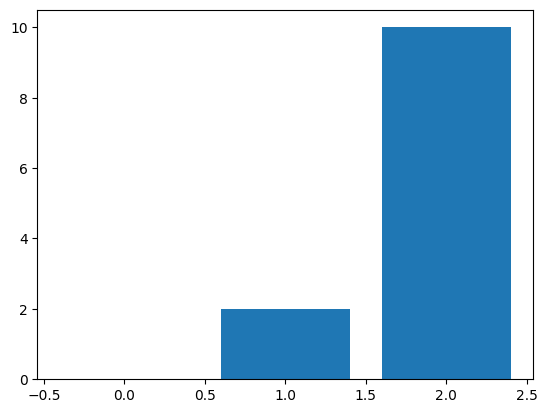

In [3]:
dens_a = [0, 2, 10]
plt.bar(range(len(dens_a)), dens_a);

In [4]:
def generate_graph_a() -> nx.Graph:
    # YOUR CODE HERE
    #raise NotImplementedError()
    return nx.path_graph(12)

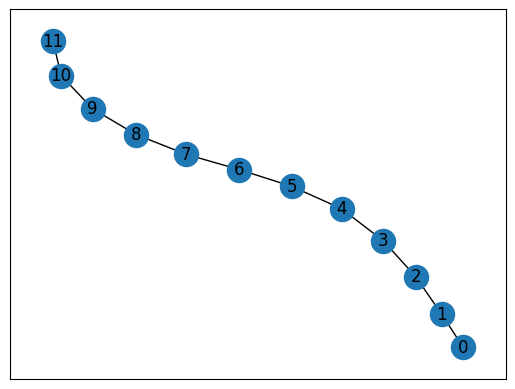

In [5]:
G = generate_graph_a()
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph B__

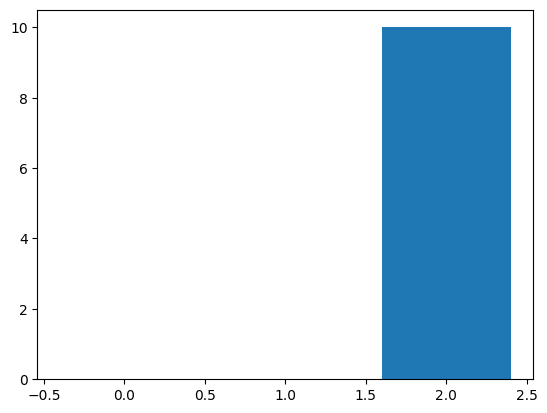

In [6]:
dens_b = [0, 0, 10]
plt.bar(range(len(dens_b)), dens_b);

In [7]:
def generate_graph_b() -> nx.Graph:
    # YOUR CODE HERE
    G = nx.path_graph(10)
    G.add_edge(0, 9)
    return G
    #raise NotImplementedError()

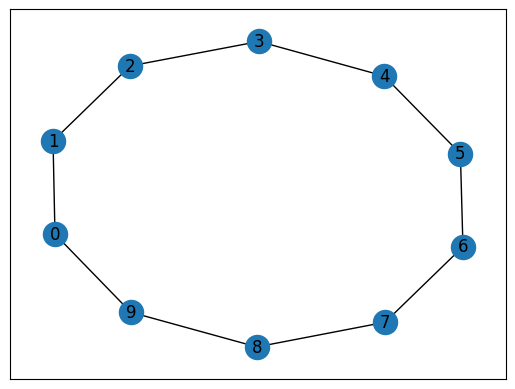

In [8]:
G = generate_graph_b()
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph C__

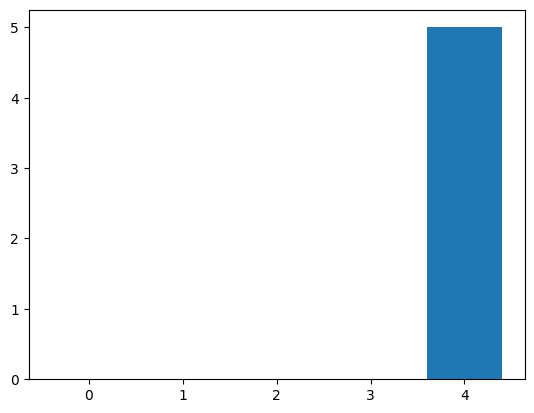

In [9]:
dens_c = [0, 0, 0, 0, 5]
plt.bar(range(len(dens_c)), dens_c);

In [10]:
def generate_graph_c() -> nx.Graph:
    # YOUR CODE HERE
    #raise NotImplementedError()
    return nx.complete_graph(5)

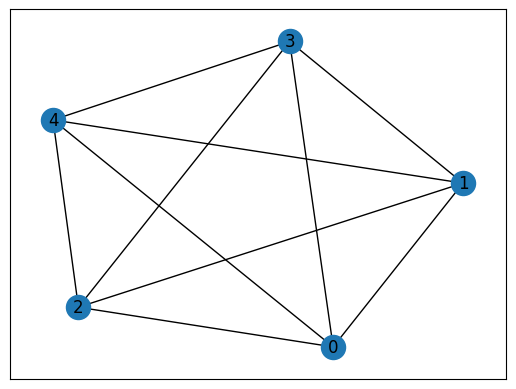

In [11]:
G = generate_graph_c()
assert nx.degree_histogram(G) == dens_c
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph D__

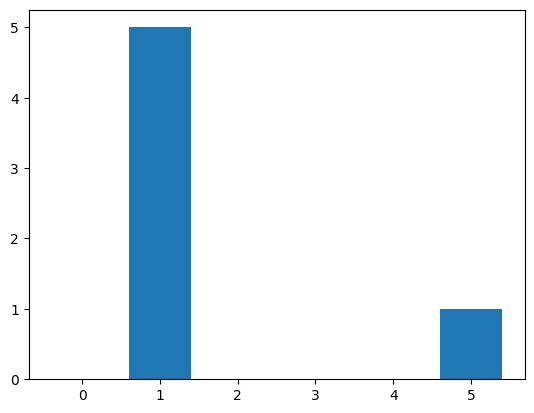

In [12]:
dens_d = [0, 5, 0, 0, 0, 1]
plt.bar(range(len(dens_d)), dens_d);

In [13]:
def generate_graph_d() -> nx.Graph:
    # YOUR CODE HERE
    #raise NotImplementedError()
    return nx.star_graph(5)

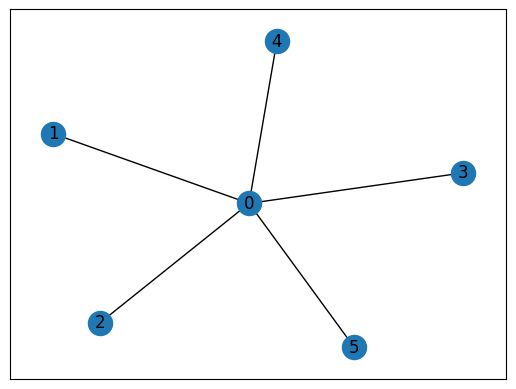

In [14]:
G = generate_graph_d()
assert nx.degree_histogram(G) == dens_d
assert nx.is_connected(G)
nx.draw_networkx(G)

### Task 2. Network degree CDF (0 points)

In this task we will estimate CDF of degree distribution of a given graph. Firstly, let us download the Game of Thrones relationships dataset and create a graph.

In [15]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/game_of_thrones_relationships.csv")


In [16]:
raw_data.head()

,character1,character2,relationship,type
0,/wiki/Nymeria_Sand,/wiki/Oberyn_Martell,father,biological
1,/wiki/Bran_Stark,/wiki/Eddard_Stark,father,biological
2,/wiki/Bran_Stark,/wiki/Catelyn_Stark,mother,NaN
3,/wiki/Lothar_Frey,/wiki/Walder_Frey,father,biological
4,/wiki/Robb_Stark,/wiki/Eddard_Stark,father,biological


In [17]:
g = nx.from_pandas_edgelist(raw_data, source="character1", target="character2")

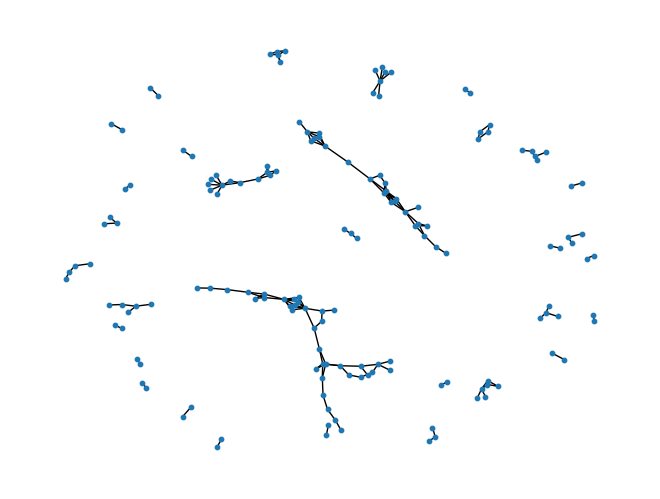

In [18]:
nx.draw(g, node_size=10)

In the social network analysis, we will often consider the largest connected component only. Before estimation of CDF, we need to remove all connected components except of the largest one.

_Hint: use `nx.connected_components` to get a list of nodes for each connected component._

In [19]:
list(nx.connected_components(g))

[{'/wiki/Ellaria_Sand',
  '/wiki/Nymeria_Sand',
  '/wiki/Obara_Sand',
  '/wiki/Oberyn_Martell',
  '/wiki/Tyene_Sand'},
 {'/wiki/Aegon_IV_Targaryen',
  '/wiki/Aegon_V_Targaryen',
  '/wiki/Aemon',
  '/wiki/Aerys_II_Targaryen',
  '/wiki/Arya_Stark',
  '/wiki/Benjen_Stark',
  '/wiki/Bharbo',
  '/wiki/Bran_Stark',
  '/wiki/Brandon_Stark',
  '/wiki/Catelyn_Stark',
  '/wiki/Daenerys_Targaryen',
  '/wiki/Daeron_II_Targaryen',
  '/wiki/Drogo',
  '/wiki/Dyanna_Dayne',
  '/wiki/Eddard_Stark',
  '/wiki/Edmure_Tully',
  '/wiki/Hoster_Tully',
  '/wiki/Jasper_Arryn',
  '/wiki/Jon_Arryn',
  '/wiki/Jon_Snow',
  '/wiki/Khal_Drogo',
  '/wiki/Lyanna_Stark',
  '/wiki/Lysa_Arryn',
  '/wiki/Maekar_I_Targaryen',
  '/wiki/Maekar_Targaryen',
  '/wiki/Minisa_Tully',
  '/wiki/Myriah_Martell',
  '/wiki/Naerys_Targaryen',
  '/wiki/Rhaegar_Targaryen',
  '/wiki/Rhaego',
  '/wiki/Rhaella_Targaryen',
  '/wiki/Rickard_Stark',
  '/wiki/Rickon_Stark',
  '/wiki/Robb_Stark',
  '/wiki/Robin_Arryn',
  '/wiki/Sansa_Stark',
  '

In [20]:
def select_gygantic_component(g: nx.Graph) -> nx.Graph:
    # YOUR CODE HERE
    comps = nx.connected_components(g)
    nodes = sorted(comps, key = lambda x: len(x))[-1]
    return g.subgraph(nodes)
    #raise NotImplementedError()

In [21]:
gg = select_gygantic_component(g)
assert gg.number_of_edges() == 49
assert gg.number_of_nodes() == 37

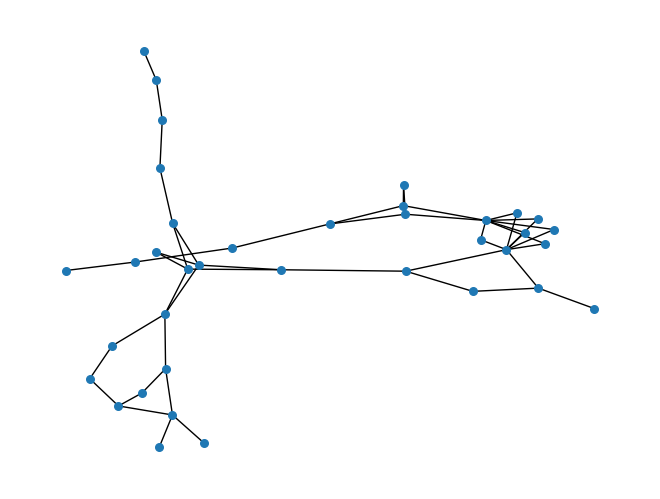

In [22]:
nx.draw(gg, node_size=30)

Now we can calculate an empirical CDF for a given graph. Recall a formal definition of CDF

$$F_X(x) = P(X \leq x)$$

And in empirical CDF, we estimate probability by share of nodes.

Write a method `empirical_cdf` that takes a graph and returns a np.array of probabilities. The first element is related to the node degree 0, the second — the node degree 1 and so on. The method should be able to group degrees occurence into equaly distributed bins.

_Hint: use `nx.degee_histogram` to return a degree histogram — a list of numbers of nodes for each degree._

In [23]:
nx.degree_histogram(g)

[0, 75, 46, 24, 6, 4, 2, 1, 2]

In [24]:
nx.degree_histogram(gg)

[0, 5, 17, 9, 4, 0, 0, 0, 2]

In [25]:
def empirical_cdf(g: nx.Graph) -> List[float]:
    # YOUR CODE HERE
    hist = nx.degree_histogram(g)
    return np.cumsum(hist) / np.sum(hist)
    #raise NotImplementedError()

In [26]:
ecdf = empirical_cdf(gg)
assert ecdf[0] == 0
assert ecdf[-1] == 1
assert np.all(ecdf[:-1] <= ecdf[1:])
assert adler32(str(empirical_cdf(gg).round(4).sum()).encode()) == 70123823

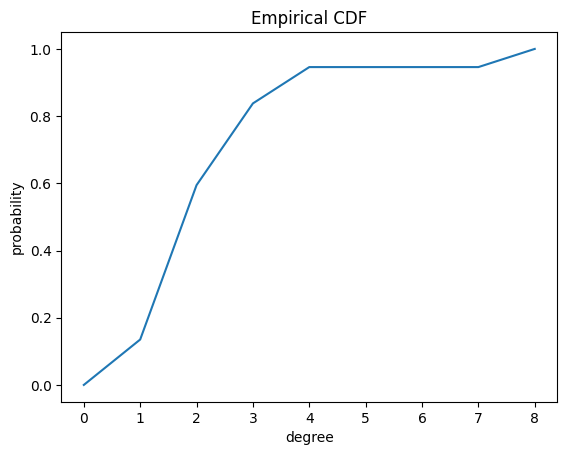

In [27]:
plt.plot(ecdf)
plt.xlabel('degree')
plt.ylabel('probability')
plt.title('Empirical CDF')
plt.show()

### Task 3. Power law CDF (0 points)

Scale-free network has a Power law degree distribution. Let us take a closer look at this distribution. The PDF of the Power law is

$$ p(x) = Cx^{-\alpha},$$

where $C$ is a normalization constant

$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$

and $\alpha>1$ is called an exponent of the distribution.

In [117]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

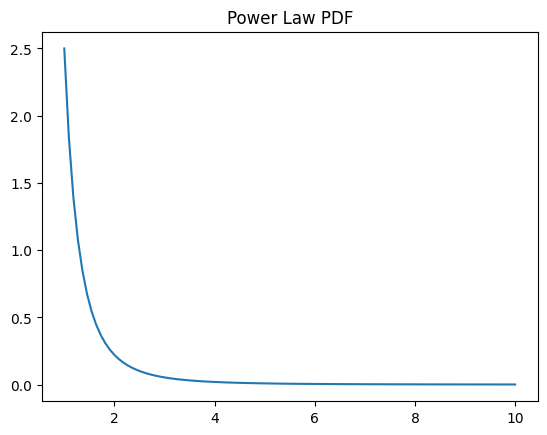

In [118]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_pdf(x_space))
plt.title('Power Law PDF');

Let us generate observations from a Power Law RV. The first step is to derive CDF of Powel law: $F(x) = P(X \leq x)$

$$F(x) = 1 - \int_{x}^\infty p(t) dt.$$

Take the integral, derive CDF analytically and then write a function `power_law_cdf` with parameters `x`, `alpha` and `x_min`.

In [119]:
from scipy.integrate import quad
def power_law_cdf(x, alpha=3.5, x_min=1):
    integral, _ = quad(lambda t: power_law_pdf(t, alpha, x_min), x, float('inf'))
    return 1 - integral

In [120]:
assert power_law_cdf(2, 2, 1) == 0.5
assert power_law_cdf(10, 2, 1) == 0.9
assert adler32(str(power_law_cdf(2, 3, 1)).encode()) == 32571595

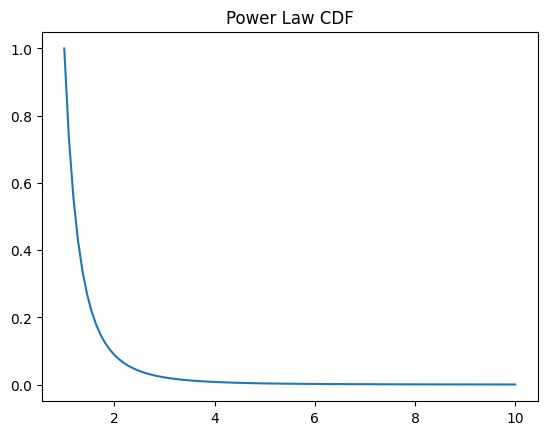

In [110]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_cdf(x_space))
plt.title('Power Law CDF');

### Task 4. Power law PPF (0 points)

Let $X \sim \text{Power law}$. Next, define a random variable $R$, s.t. $R = F(X)$, so $R$ will be uniformly distributed on interval [0, 1] ([proof](https://en.wikipedia.org/wiki/Probability_integral_transform#Proof)). Good thing here is that we easily can generate uniformly distributed pseudorandom numbers and then transform them into Power Law. Let us find an expression for $x = F^{-1}(r)$, where $r$ is an observation from uniform distrubution on interval [0, 1].

Find an analytical form of $F^{-1}(r)$ and write a function `power_law_ppf` (percent point function, also known as a quantile) with parameters `r`, `alpha` and `x_min`.

In [33]:
def power_law_ppf(r, alpha=3.5, x_min=1):
    return x_min * (1 - r) ** (1 / (1 - alpha))

In [34]:
assert round(power_law_ppf(0.5, 2, 1), 2) == 2
assert round(power_law_ppf(0.9, 2, 1), 2) == 10
assert adler32(str(round(power_law_ppf(0.96, 3, 1), 2)).encode()) == 19792020

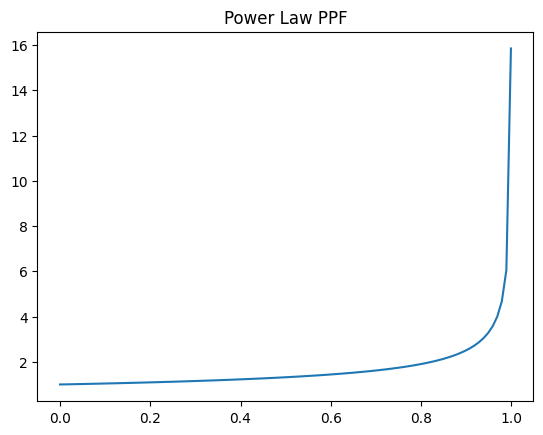

In [35]:
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, power_law_ppf(x_space))
plt.title('Power Law PPF');

Finally, we can generate observation from Power law distribution as follows:
1. Generate observation from uniform distribution on interval [0, 1]
2. Calculate PPF value of given observation

In [36]:
def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

Look at the histogram of the generated sample

In [37]:
alpha = 3.5
x_min = 1
x_train = power_law_generate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

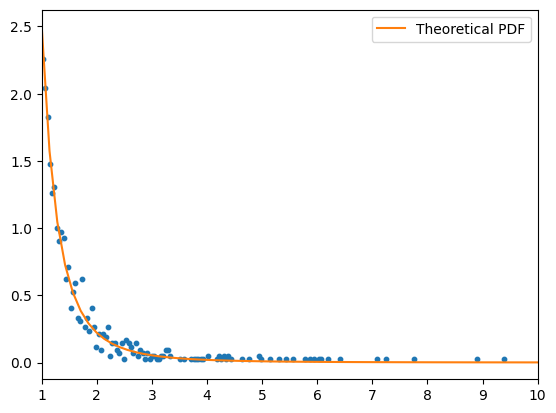

In [38]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min),
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()

And here is the same histogram in log-log scale

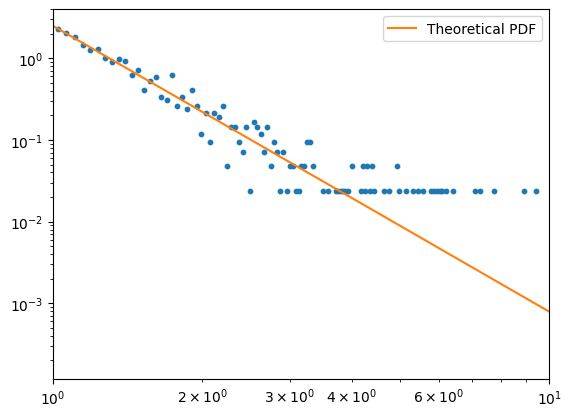

In [39]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min),
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

### Task 5. Estimation of alpha with linear binning (0 points)

Given observations from the Power Law distribution, try to estimate $\alpha$. The easiest way is to draw an empirical PDF with linear binning in log-log scale and apply linear regression. By _linear binning_ we mean to keep a bin width is fixed.

Write a function `alpha_lin_bins` that takes a train set, number of linear bins and returns an estimated $\alpha$.

_Hints:_
* _Take log in both side of $p(x) = Cx^{-\alpha}$_
* _To calculate an empirical PDF, use `np.histogram(x_train, bins=bins, density=True)`_
* _To calculate pseudoinverse matrix, use `np.linalg.pinv`_
* _Also you can fit `sklearn.linear.LinearRegression`_

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression

def alpha_lin_bins(x_train, bins):
    hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    idx = np.argwhere(hist > 0)

    log_centers = np.log(bin_centers[idx][:,0]).reshape(-1, 1)
    log_hist = np.log(hist[idx])

    lr = LinearRegression(fit_intercept=True).fit(log_centers, log_hist)
    return -lr.coef_[0][0]

In [41]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_lin_bins(x_train, bins) - 2) < 0.7
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_lin_bins(x_train, bins) - 3.5) < 0.9
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_lin_bins(x_train, bins) - 10) < 2

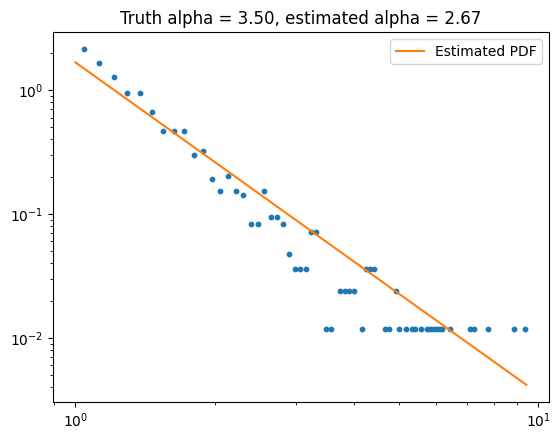

In [42]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_lin_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min),
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()

### Task 6. Estimation of alpha with logarithmic binning (3 points)

As we see the estimation with linear binning is noticeably inaccurate. For logarithmic binning we let the bin sizes increase with the value, making sure that each bin has a comparable number of observations.

Write a function `alpha_log_bins` that takes a train set, number of log bins and returns an estimated $\alpha$.

In [43]:
def alpha_log_bins(x_train, bins):
    # Calculate logarithmic bin edges
    log_bin_edges = np.logspace(np.log10(min(x_train)), np.log10(max(x_train)), bins)

    # Compute histogram with logarithmic bins
    hist, _ = np.histogram(x_train, bins=log_bin_edges, density=True)
    bin_centers = (log_bin_edges[1:] + log_bin_edges[:-1]) / 2

    # Remove zero-valued bins
    idx = np.argwhere(hist > 0)
    log_centers = np.log(bin_centers[idx][:, 0]).reshape(-1, 1)
    log_hist = np.log(hist[idx])

    # Perform linear regression to estimate alpha
    lr = LinearRegression(fit_intercept=True).fit(log_centers, log_hist)
    return -lr.coef_[0][0]

In [44]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_log_bins(x_train, bins) - 2) < 0.2
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_log_bins(x_train, bins) - 3.5) < 0.5
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_log_bins(x_train, bins) - 10) < 1.5

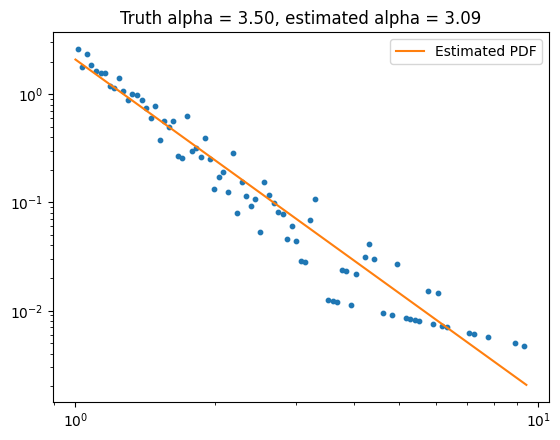

In [45]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
binning = np.logspace(np.log10(x_min), np.log10(x_train.max()), bins)
hist, bin_edges = np.histogram(x_train, bins=binning, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_log_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min),
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()